# Introduction
## Background
Freedom Debt Relief’s customers are people who have a substantial amount of debt and because of an unexpected hardship, are no longer able to make their minimum monthly payments. Upon enrolling in Freedom’s Debt Relief program, customers cease making payments to their creditors and instead make deposits they can afford into a new dedicated bank account with Freedom. Freedom uses these funds to negotiate with each of the client’s creditors to settle the debt, typically at only a fraction of what was originally owed. Once a settlement has been agreed upon for an individual account, Freedom facilitates payments from the dedicated bank account to the creditor based on the terms of the settlement agreement. Freedom then collects fees from the client for the individual account that was settled. Freedom earns fees for each account it successfully negotiates a settlement agreement. The number of settlement agreements Freedom can negotiate is proportional to the monthly deposited amount.

## Project goal
Freedom ran a recent marketing campaign to promote the value proposition of how the debt relief program helps people achieve financial freedom. Assume the cost of this campaign was $5 million. There are five months of data in the datasets provided. The campaign took place over the course of the third month. We now want to show the marketing, sales and operations teams just how successful this campaign was.

Using the three datasets given:

* Provide a quantitative assessment of whether the marketing campaign was successful. How and why did I choose the specific success metric(s)?
* Based on the provided data, What are the recommend adjusted campaign strategies in the future to improve performance?
* How  campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6? Provide an incremental number versus the result in Question 1.


## Conclusion
1. After the quick data exploration, here are some conclusions about datasets:
    * There are total 46,347 unique client
    * Marketing Campaign related date range: Total 5 months which are from 2019-06-01 to 2019-10-31
    * There is no missing value inside all 3 datasets
    

2. Q1:I use 2 ways to check whether **the marketing campaign is success**. 

    * The first is to check the Freedom's fee rate through Internet which indicates the campaign is definitely successful
    * The second way which I refer to the given information, the campaign still is successful if Freedom fee rate is above **8.75%**. Also, during analysis, we know that the increase rate of both audience number and deposit amount is **around 2.54% before campaign whereas 7% and 8% after campaign. i.e. 2 times increase**. From increase rate, we could say the Marketing campaign is success.   
    
    
3. Q2: I explore the campaign effect from residence status, region,age groups, and combination of the above point of views.My focus in on the total/median/mean of actual deposit which is the Freedom profit base.
    * **Region**: in the future campaigns, we can put **more effort on west region** which seems more like to response to the campaign. Also **be careful the strategies that applied to mid-west** if the current campaign does not intend to drop the deposit amount differently in different regions
    * ** Residence status**:  Overall,the clients that owns house are 2 times of those who rent house. In total deposit amount, the clients **who owned house deposit increase more** than rent ones even both increase during campaign. we also notice that the median deposit amount dropped more in clients who owned houses. The interesting thing is the actual mean deposit are greater than scheduled ones
    * **Age Group**: in campaign, we can put more focus on clients who are **from 40 to 60** and followed by 60-70 and 30-40 old customers. They response better than other groups
    * **Combination**: I calculate the **average increase rate of actual deposit amount** of each section as well as **post-campaign deposit base distribution** first and then combine them to identify clients who bring the biggest return to the campaign.The **top 3 sections that bring the biggest return to the campaign are west region clients who Own house and age are among 40-50, 50-60 and 30-40 groups**  
    * Last, during the campaign month, the deposit increase a lot and then slowly drop down after campaign and has the trend to decrease. if possible, Freedom need to make policies to keep the deposit amount stable 
if campaign is postponed to month 6, we assume  
  
4. Q3: My Assumption is  that freedom's clients amount are keep increasing rate as it happened from Month 1 to 2 and till to the Month 5 if campaign is postponed to month 6. And the impact of campaign that postponed to Month 6 is the same as that is in Month 3.  
Conclusion: Comparing to the campaign deployed at Month 3, if Freedom postponed the campaign till to month 6. It is still **a success**.
 * They will get **$85k more** actual deposit
 * The campaign cost is 42.55% of the increased actual deposit which compares to the deposit without campaign. The percentage is 45.88% at campaign deployed at Month 3
 * The **threshold fee rate drops 0.64% to 8.12%** which can keep balance with the campaign cost.    


## Data Description
`client_data.csv`: Data specific to fictional clients

* `client_id`: Randomly generated unique surrogate identifier for a client
* `client_geographical_region`: Client geographical location in relation to U.S. Census definitions
* `client_residence_status`: Client residence status in relation to whether they rent or own
* `client_age`: Client age in relation to date of birth

`deposit_data.csv`: Data specific to the client deposit behavior

* `client_id`: Randomly generated unique surrogate identifier for a client
* `deposit_type`: Delineates whether a client deposit is the scheduled record or actual record
* `deposit_amount`: Client deposit amount to the dedicated bank account with Freedom
* `deposit_cadence`: Timing and pattern of client deposit activity
* `deposit_date`: Deposit date for deposit type

`calendar_data.csv`: This is a calendar reference table

* `gregorian_date`: This date aligns with the Gregorian calendar
* `month_name`: These are the designated months in the case study
    * Month 1 and 2 are pre-campaign
    * Month 3 is the campaign
    * Month 4 and 5 are post-campaign
    
 Assume the following:

There is no seasonality in the results, and the campaign spend was distributed evenly across Month 3 (i.e., spend on the first day is the same as spend on the last day).

# Import Packages, Data and have a quick look

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
# % inline matplotplib  

pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)

In [55]:
path=Path()/'datasets'
# Read client data
client_data = pd.read_csv(path/'client_data.csv')
print(f'Client data shape is:{client_data.shape}')
print('-' *30)
print(f'Null value info:\n{client_data.isnull().sum()}')
print('-' *30)
for col in client_data.select_dtypes(include='O').columns.to_list():
    print(f'The unique value of {col} is :{client_data[col].unique()}')
client_data.sample(5)

Client data shape is:(46347, 4)
------------------------------
Null value info:
client_id                     0
client_geographical_region    0
client_residence_status       0
client_age                    0
dtype: int64
------------------------------
The unique value of client_geographical_region is :['Northeast' 'West' 'Midwest' 'South']
The unique value of client_residence_status is :['Rent' 'Own']


,client_id,client_geographical_region,client_residence_status,client_age
26859,786909741394276,West,Own,55
7662,667941698615495,West,Own,36
24418,538164040294199,West,Rent,53
6513,108131182202100,South,Rent,35
10289,457307999861231,South,Rent,39


In [56]:
# Read deposit data
deposit_data = pd.read_csv(path/'deposit_data.csv', parse_dates=['deposit_date'])
print(f'Deposit data shape is:{deposit_data.shape}')
print('-' *30)
print(f"Brief info:\n {deposit_data.info()}")
print('-' *30)
print(f"Brief description:\n {deposit_data.describe(datetime_is_numeric=True)}")
print('-' *30)
print(f'Null value info:\n{deposit_data.isnull().sum()}')
print('-' *30)
print(f'Unique client id are:\n{deposit_data.client_id.nunique()}')
print('-' *30)
for col in deposit_data.select_dtypes(include='O').columns.to_list():
    print(f'The unique value of {col} is :{deposit_data[col].unique()}')
print('-' *30)
deposit_data.sample(5)

Deposit data shape is:(480394, 5)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480394 entries, 0 to 480393
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   client_id        480394 non-null  int64         
 1   deposit_type     480394 non-null  object        
 2   deposit_amount   480394 non-null  float64       
 3   deposit_cadence  480394 non-null  object        
 4   deposit_date     480394 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 18.3+ MB
Brief info:
 None
------------------------------
Brief description:
           client_id  deposit_amount                   deposit_date
count  4.803940e+05   480394.000000                         480394
mean   4.992809e+14      365.207130  2019-08-20 17:37:29.398618880
min    1.460463e+11        0.010000            2019-06-01 00:00:00
25%    2.477689e+14      200

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
313142,204613656657859,Actual Deposit,108.0,Extra,2019-10-27
432511,908806789218291,Actual Deposit,240.0,Monthly,2019-09-20
377527,581395912492397,Actual Deposit,689.0,Biweekly,2019-09-04
413749,6911441700791,Scheduled Deposit,222.0,Monthly,2019-09-15
406154,687025787397480,Scheduled Deposit,307.0,Biweekly,2019-09-14


In [57]:
# Read calendar data
calendar_data = pd.read_csv(path/'calendar_data.csv', parse_dates=['gregorian_date'])
print(f'Calendar data shape is:{calendar_data.shape}')
print('-' *30)
print(f'Brief description:\n {calendar_data.describe(datetime_is_numeric=True)}')
print('-' *30)
print(f'Null value info:\n{calendar_data.isnull().sum()}')
print('-' *30)

calendar_data.sample(5)

Calendar data shape is:(153, 2)
------------------------------
Brief description:
             gregorian_date
count                  153
mean   2019-08-16 00:00:00
min    2019-06-01 00:00:00
25%    2019-07-09 00:00:00
50%    2019-08-16 00:00:00
75%    2019-09-23 00:00:00
max    2019-10-31 00:00:00
------------------------------
Null value info:
gregorian_date    0
month_name        0
dtype: int64
------------------------------


,gregorian_date,month_name
65,2019-08-05,Month 3
150,2019-10-29,Month 5
89,2019-08-29,Month 3
127,2019-10-06,Month 5
123,2019-10-02,Month 5


In [58]:
# Test whether the client id in client data is the same as those in deposit
client=set(client_data['client_id'])
deposit_client=set(deposit_data['client_id'])
client.symmetric_difference(deposit_client)

set()

After the quick data exploration, here are some conclusions about datasets:
* There are total **46,347** unique client
* Marketing Campaign related date range: Total 5 months which are from **2019-06-01** to **2019-10-31**
* Deposit data contains all those customers deposit status within the same data range as Marketing campaign
* There is **no missing value** inside all 3 datasets

# Data processing
* Merge deposit data and Calendar data to further find the customer's deposit behavior patterns with the campaign
* Merge customer data and deposit data to dig the demographic pattern 

## Merge deposit and Calendar data

In [59]:
deposit_calender=pd.merge(left=deposit_data, right=calendar_data,\
                          left_on=['deposit_date'], right_on=['gregorian_date'], how='left').drop('gregorian_date',axis=1)
deposit_calender.sample(5)

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
202543,526592088386812,Actual Deposit,351.0,Biweekly,2019-08-06,Month 3
408379,461024749948850,Actual Deposit,722.0,Monthly,2019-09-14,Month 4
435823,15298374986693,Scheduled Deposit,334.0,Monthly,2019-09-21,Month 4
281208,768345399955845,Scheduled Deposit,214.0,Biweekly,2019-10-13,Month 5
372137,489374748936208,Actual Deposit,255.0,Biweekly,2019-06-28,Month 1


In [60]:
# The percentage of scheduled and actual deposit, Both total scheduled and actual deposite fraction are very high

deposit_data.groupby('deposit_type').client_id.nunique()/deposit_data.client_id.nunique()

deposit_type
Actual Deposit       0.938960
Scheduled Deposit    0.969987
Name: client_id, dtype: float64

In [61]:
deposit_month_dist=deposit_calender.groupby(['deposit_type','month_name']).client_id.nunique()/\
deposit_calender.client_id.nunique()
deposit_month_dist.unstack()

month_name,Month 1,Month 2,Month 3,Month 4,Month 5
deposit_type,,,,,
Actual Deposit,0.626189,0.642113,0.863637,0.806395,0.807021
Scheduled Deposit,0.678555,0.692019,0.921894,0.861027,0.858265


[]

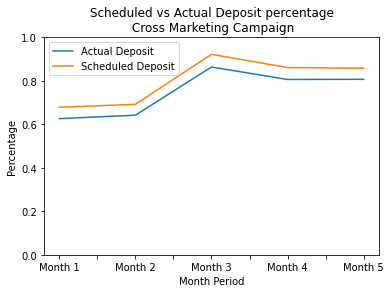

In [62]:
# From the plot, we could observe the significant lift in both scheduled and actual deposit percentage after campaign
# The peak is in the campaign month and then slowly drop down.
deposit_month_dist_df =deposit_month_dist.reset_index(name='pct')
deposit_month_dist_df.pivot_table(values='pct', index='month_name',columns= 'deposit_type').plot()
plt.title('Scheduled vs Actual Deposit percentage\n Cross Marketing Campaign')
plt.xlabel('Month Period')
plt.ylabel('Percentage')
plt.ylim(0,1)
plt.legend()
plt.plot()

Text(0, 0.5, 'Deposit Amount')

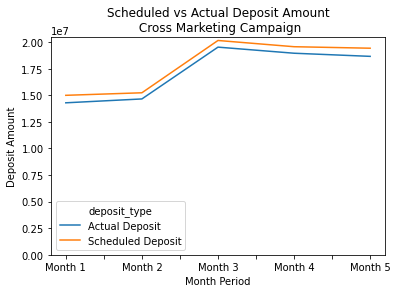

In [63]:
#Monthly deposit amount also has significant change during the campaign month and back to stable after campaign
deposit_amount = deposit_calender.groupby(['deposit_type','month_name']).deposit_amount.sum()
ax = deposit_amount.unstack(level=0).plot(kind='line')
ax.set_title('Scheduled vs Actual Deposit Amount\n Cross Marketing Campaign')
ax.set_xlabel('Month Period')
ax.set_ylim(0)
ax.set_ylabel('Deposit Amount')

# Q1:Whether the Marketing campaign is success?
I use 2 ways to check whether the marketing campaign is success. 
* The first is to check the Freedom's fee rate through Internet which indicates the campaign is definitely successful
* The second way which I refer to the given information, the campaign still is successful if the fee rate is above 8.75% 
Also, during analysis, we know that before campaign, the increase rate of both audience number and deposit amount is around 2.54% wheras 7% and 8% after campaign. From increase rate, we could say the Marketing campaign is success. 

After exploration, we know freedom clients' schedule deposit and actual deposit are 2 independent event. **6.1%** only schedule the deposit but no follow-up actual deposit, **3%** make actual deposit without schedule and **90.9%** of them make schedule first and then deposit. For Freedom make profit on actual deposit. we judge the profit success on actual deposit only

In [64]:
for customer in deposit_data['client_id'].sample(5):
    print (deposit_data[deposit_data.client_id == customer].sort_values(by='deposit_date'))

              client_id       deposit_type  deposit_amount deposit_cadence  \
17651   763129538093328  Scheduled Deposit           112.0         Monthly   
17653   763129538093328     Actual Deposit           112.0         Monthly   
17650   763129538093328  Scheduled Deposit           112.0         Monthly   
17654   763129538093328     Actual Deposit           112.0         Monthly   
17647   763129538093328  Scheduled Deposit           100.0         Monthly   
17648   763129538093328     Actual Deposit           100.0         Monthly   
397585  763129538093328  Scheduled Deposit           112.0         Monthly   
397586  763129538093328     Actual Deposit           112.0         Monthly   
17649   763129538093328  Scheduled Deposit           112.0         Monthly   
17652   763129538093328     Actual Deposit           112.0         Monthly   

       deposit_date  
17651    2019-06-11  
17653    2019-06-11  
17650    2019-07-11  
17654    2019-07-11  
17647    2019-08-11  
17648    

In [65]:
actual_deposit_client = set(deposit_data[deposit_data.deposit_type=='Actual Deposit'].client_id.unique())
scheduled_deposit_client = set(deposit_data[deposit_data.deposit_type=='Scheduled Deposit'].client_id.unique())
actual_deposit_only= actual_deposit_client - scheduled_deposit_client
scheduled_deposit_only = scheduled_deposit_client -actual_deposit_client
scheduled_actual_deposit = scheduled_deposit_client & actual_deposit_client
total_set_len = len(actual_deposit_only) + len(scheduled_deposit_only) +len(scheduled_actual_deposit)
print(f'There are total {total_set_len} client wheras {total_set_len== len(client) } match the unique client number')

print('Among all unique clients:')
print(f' {len(scheduled_deposit_only)/total_set_len:.2%} are scheduled deposit only client')
print(f' {len(actual_deposit_only)/total_set_len:.2%} are actual deposit only client')
print(f' {len(scheduled_actual_deposit)/total_set_len:.2%} are scheduled and actual deposit both client')

There are total 46347 client wheras True match the unique client number
Among all unique clients:
 6.10% are scheduled deposit only client
 3.00% are actual deposit only client
 90.89% are scheduled and actual deposit both client


## Comparison from the deposit amount and clients number
Compare the before and after campaign, the increase rate of both deposit amount and clients number are raised significantly which is above 3.5 times of before. From this point of view, we can say the campaign is success

In [66]:
Mth1_clients= deposit_calender[(deposit_calender.deposit_type=='Actual Deposit')&\
(deposit_calender.month_name=='Month 1')].client_id.nunique()
Mth2_clients= deposit_calender[(deposit_calender.deposit_type=='Actual Deposit')&\
(deposit_calender.month_name=='Month 2')].client_id.nunique()

baseline_rate = (Mth2_clients-Mth1_clients)/Mth1_clients

print(f'The baseline growing rate without campaign is {baseline_rate:.2%}')

The baseline growing rate without campaign is 2.54%


In [67]:
deposit_df_analysis=deposit_calender[deposit_calender.deposit_type=='Actual Deposit'].\
groupby(['month_name'], as_index=False).client_id.nunique().rename(columns={'client_id':'client_num_act'})
deposit_df_analysis['acct_num_pct_change']=deposit_df_analysis['client_num_act'].pct_change()
apply_campaign_account_rate=deposit_df_analysis[deposit_df_analysis.month_name.isin\
                                                           (['Month 3', 'Month 4','Month 5'])]['acct_num_pct_change'].mean()
apply_campaign_account_rate

0.09316298641311323

In [68]:
deposit_df_analysis['actual_depoist']=deposit_calender[deposit_calender.deposit_type=='Actual Deposit'].\
groupby('month_name').deposit_amount.sum().values
deposit_df_analysis['acct_deposit_pct_change']=deposit_df_analysis['actual_depoist'].pct_change()
apply_campaign_deposit_rate=deposit_df_analysis[deposit_df_analysis.month_name.isin\
                                                           (['Month 3', 'Month 4','Month 5'])]\
['acct_deposit_pct_change'].mean()
apply_campaign_deposit_rate

0.09584906367915154

In [69]:
print(f'After apply campaign, account increase rate is {apply_campaign_account_rate/baseline_rate:.2f} times that of before,')
print(f'actual deposit increase rate is {apply_campaign_deposit_rate/baseline_rate:.2f} times that of before')

After apply campaign, account increase rate is 3.66 times that of before,
actual deposit increase rate is 3.77 times that of before


In [70]:
deposit_df_analysis

,month_name,client_num_act,acct_num_pct_change,actual_depoist,acct_deposit_pct_change
0,Month 1,29022,NaN,14290184.25,NaN
1,Month 2,29760,0.025429,14653623.58,0.025433
2,Month 3,40027,0.344993,19524393.05,0.332394
3,Month 4,37374,-0.066280,18951569.18,-0.029339
4,Month 5,37403,0.000776,18657678.80,-0.015507


## Comparison from cost and profit
### Way 1: Getting related fee rate from internet
#### Making Assumption according to the info

For Freedom collects fees from the client for the individual account that was settled. After google the company, I find the following useful info which I can used as the base of assumption. 
* Generally, A new client must have a minimum total debt balance of $7,500 to qualify, but some states have laws setting higher minimums.
* A typical new client has an average of $23,000 in unsecured debt across eight to nine credit accounts when they enroll with Freedom
* As money accrues in the dedicated account, Freedom begins negotiating with individual creditors on client behalf in an effort to get them to accept less than the amount the client owe.
* The freedom fee ranges from 15% to 25%; it's based on the amount of the enrolled debt and may vary depending on state regulations.
* There’s also a one-time fee of $9.95 to set up the special-purpose account, and a monthly fee of $9.95 that covers account servicing

That is to say Freedom's profit is the sum of the multiplication of the amount of each deposit account and the fee rate. The success metrics are each account total amount and account number.Here are assumptions
* The Freedom fee rate is 20%
* The valid accounts are those have actual deposit. i.e. deposit_type='Actual Deposit'
* For each valid account, the assuming amount will be 7500 and 23000, I'll calculate each amount to identify the success.
* Assuming, the grow rate of gaining the new client is the same without campaign, i.e. I use grow rate before campaign as baseline and delta rate as the result of campaign infection 



In [71]:
def calculate_control(mth1, mth2, mths=5,round_int=False):
    '''Calculate the number if not applying the campaign with the assumption 
    that the increase rate is the constant or the same as pre-campaign'''
    baseline_rate = (mth2-mth1)/mth1
    mths_baseline = [mth1, mth2]

    for _ in range(2, mths):
        
        tmp = mths_baseline[-1]*(1+baseline_rate)
        if round_int: 
            tmp = int(tmp)
        mths_baseline.append(tmp)
        
    return mths_baseline
    

In [72]:
deposit_df_analysis['client_num_base']= calculate_control(Mth1_clients, Mth2_clients, mths=5, round_int=True)
deposit_df_analysis['client_num_delta']=deposit_df_analysis['client_num_act']-\
deposit_df_analysis['client_num_base']
delta_account= deposit_df_analysis['client_num_delta'].sum()
print(f'Freedom gets {delta_account} more clients after apply the campaign')
deposit_df_analysis

Freedom gets 20911 more clients after apply the campaign


,month_name,client_num_act,acct_num_pct_change,actual_depoist,acct_deposit_pct_change,client_num_base,client_num_delta
0,Month 1,29022,NaN,14290184.25,NaN,29022,0
1,Month 2,29760,0.025429,14653623.58,0.025433,29760,0
2,Month 3,40027,0.344993,19524393.05,0.332394,30516,9511
3,Month 4,37374,-0.066280,18951569.18,-0.029339,31291,6083
4,Month 5,37403,0.000776,18657678.80,-0.015507,32086,5317


In [73]:
campaign_fee = 5000000
#scenario1: If using the threshold that got from news, freedom's campaign is definitely success
fee_rate=0.15


for threshold in [7500, 23000]:
    profit= delta_account*(fee_rate*threshold ) - campaign_fee
    if profit >campaign_fee:
        print(f'The campaign for threshold as {threshold} is profitable and the profit is {profit}')
    else:
        print(f'The campaign for threshold as {threshold} is not profitable and the profit is {profit}')


The campaign for threshold as 7500 is profitable and the profit is 18524875.0
The campaign for threshold as 23000 is profitable and the profit is 67142950.0



### Way 2: According to the given information.
* The number of settlement agreements Freedom can negotiate is proportional to the monthly deposited amount.
* Assume industry statistics for any analysis input that you would want to use that is not provided here, including but not limited to fee percentage Freedom would collect along with ongoing cost per client between initial enrollment and program graduation.
*  Calculate according to the significant increased monthly actual deposied amount that triggered by campaign

Conclusion. If freedom's fee rate is above 8.75%, from the cost point of view, the campaign is success

In [74]:
Mth1_actual_deposit=  deposit_calender[(deposit_calender.deposit_type=='Actual Deposit')&\
(deposit_calender.month_name=='Month 1')].deposit_amount.sum()
Mth2_actual_deposit= deposit_calender[(deposit_calender.deposit_type=='Actual Deposit')&\
(deposit_calender.month_name=='Month 2')].deposit_amount.sum()

baseline_rate = (Mth2_actual_deposit-Mth1_actual_deposit)/Mth1_actual_deposit

print(f'The baseline growing rate without campaign is {baseline_rate:.2%}')

The baseline growing rate without campaign is 2.54%


In [75]:

deposit_df_analysis['actual_depoist_base']= calculate_control(Mth1_actual_deposit, Mth2_actual_deposit, mths=5)
deposit_df_analysis['actual_depoist_delta']=deposit_df_analysis['actual_depoist']-\
deposit_df_analysis['actual_depoist_base']
delta= deposit_df_analysis['actual_depoist_delta'].sum()
print(f'Freedom gets {round(delta,2):,} more actual deposit after apply the campaign')
# from the data we could find 5 million campaign bring back around 10.9 million actual amount,i.e. Marketing fee is around
# 46% of the delta deposit. So, only if the fee rate for delta amount is great than 46%,  we can say the Marketing campaign is success
campaign_delta_ratio= campaign_fee/delta
print(f'The campaign vs delta actual deposits are {campaign_delta_ratio:.2%}')
after_campaign_actual_depoist = deposit_df_analysis[deposit_df_analysis.month_name.isin\
                                                           (['Month 3', 'Month 4','Month 5'])]['actual_depoist'].sum()
fee_rate_threshold= campaign_fee/after_campaign_actual_depoist
print(f'The success campaign related fee rate threshold is {fee_rate_threshold:.2%}')

Freedom gets 10,898,520.14 more actual deposit after apply the campaign
The campaign vs delta actual deposits are 45.88%
The success campaign related fee rate threshold is 8.75%


In [76]:
deposit_df_analysis

,month_name,client_num_act,acct_num_pct_change,actual_depoist,acct_deposit_pct_change,client_num_base,client_num_delta,actual_depoist_base,actual_depoist_delta
0,Month 1,29022,NaN,14290184.25,NaN,29022,0,1.429018e+07,-1.862645e-09
1,Month 2,29760,0.025429,14653623.58,0.025433,29760,0,1.465362e+07,1.862645e-09
2,Month 3,40027,0.344993,19524393.05,0.332394,30516,9511,1.502631e+07,4.498087e+06
3,Month 4,37374,-0.066280,18951569.18,-0.029339,31291,6083,1.540847e+07,3.543102e+06
4,Month 5,37403,0.000776,18657678.80,-0.015507,32086,5317,1.580035e+07,2.857331e+06


# Q2:What are the recommend adjusted campaign strategies in the future to improve performance?
we could check from demographic point of view, using th plot to exploring 
* from residence status
* from region
* from age groups
* from combination

In summary:
* During the campaign month, the deposit increase a lot and then slowly drop down after campaign and has the trend to decrease. if possible, Freedom need to make policies to keep the deposit amount stable 



In [77]:
# merge client,deposit and calendar data
client_deposit_combined=pd.merge(client_data, deposit_calender, on='client_id', how='left')
client_deposit_combined.sample(5)

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
84549,634690928060165,Midwest,Own,37,Actual Deposit,295.0,Biweekly,2019-10-13,Month 5
32032,922829266080544,Midwest,Own,30,Scheduled Deposit,710.0,Monthly,2019-08-28,Month 3
71760,741781550943071,West,Rent,36,Scheduled Deposit,608.0,Monthly,2019-06-14,Month 1
59066,156998130943134,West,Rent,34,Actual Deposit,259.0,Biweekly,2019-08-06,Month 3
166319,123620132943443,Midwest,Rent,45,Actual Deposit,269.0,Biweekly,2019-06-20,Month 1


In [78]:
# client distribution of region
def plot_bar_client_dist(df, cat_var_name,xlabel, title):
    tmp_df= df.groupby(cat_var_name).client_id.nunique().sort_values()
    tmp_df.plot(kind='bar')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

In [103]:
def plot_scheduled_actual_by_month(scheduled_df, actual_df,title):
    '''
    Plot the scheduled and actual deposit by month name to compare the changes cross
    '''
    plt.figure(figsize=(15,6))
    var_colors = ['b','g', 'r', 'c', 'm','y','k']
    for idx, var in enumerate(scheduled_df.columns):
        plt.plot(scheduled_df.index, scheduled_df[var],
                 label = f'{var}_scheduled', linestyle='--', color=var_colors[idx])

    for idx,var in enumerate(actual_df.columns):
        plt.plot(actual_df.index, actual_df[var],
                 label = f'{var}_actual', linestyle='-', color=var_colors[idx])

    plt.xlabel('Month')
    plt.ylabel('Deposit Amount')
    plt.title(title)
    plt.legend()
    plt.show()
    

## From region point of view
From region point of view, we could see the total deposit amount increase while median deposit decrease. This may relate to the campaign contents
* Total deposit increase significantly and west region client deposit amount is the largest as well as the increase rate that triggered by campaign also the largest
* Combine with the median deposit amount changes, we notice all regions median deposit dropped a little and midwest dropped more than other regions   

In summary, in the future campaigns, we can **put more effort on west region** which seems more like to response to the campaign. Also be careful the strategy to midwest if the current campaign does not intend to drop the deposit amount differently in different regions 

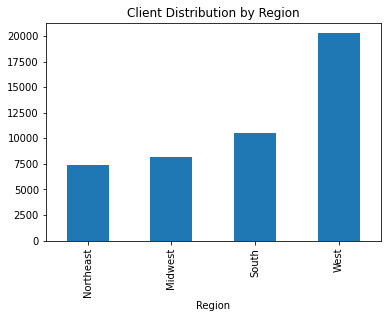

In [80]:
plot_bar_client_dist(client_deposit_combined, cat_var_name='client_geographical_region',
                 xlabel='Region', title='Client Distribution by Region')

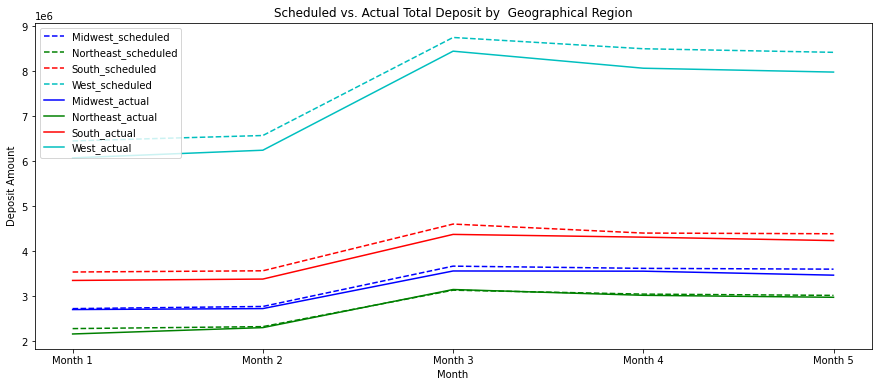

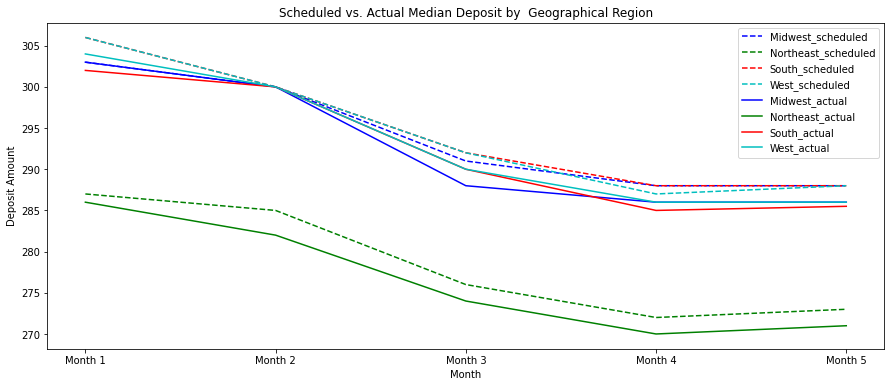

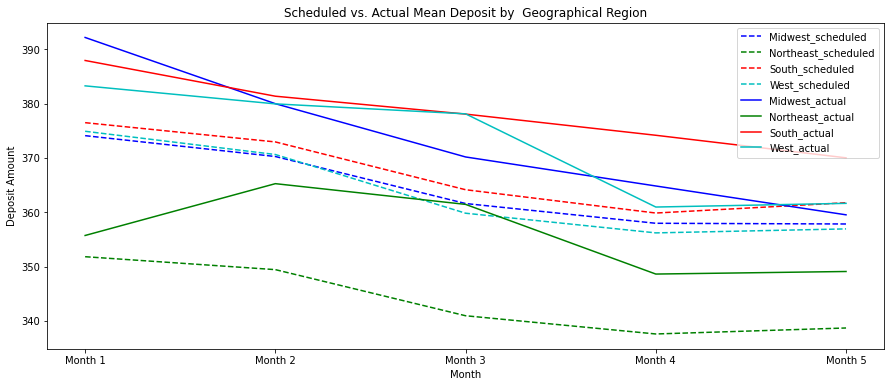

In [104]:
def  median(arr):
    return np.median(arr)

def mean(arr):
    return np.mean(arr)
func_dict={'Total':'sum', 'Median': median, 'Mean':mean}
# From above data exploration, we know there exists strong correlation between  client number  and deposit amount.
# so, here we only explore the deposit of each demographic part across the campaign deployment
for name, func in func_dict.items():
    scheduled_name =client_deposit_combined[client_deposit_combined.deposit_type=='Scheduled Deposit'].\
    groupby(['client_geographical_region','month_name']).deposit_amount\
    .agg(func)\
    .unstack(level=0)
    
    actual_name=client_deposit_combined[client_deposit_combined.deposit_type=='Actual Deposit']\
    .groupby(['client_geographical_region','month_name']).deposit_amount\
    .agg(func)\
    .unstack(level=0)

    plot_scheduled_actual_by_month(scheduled_df= scheduled_name,
                                   actual_df=actual_name,
                                   title = f'Scheduled vs. Actual {name} Deposit by  Geographical Region')

## Residence Type
From residence type, the clients that owns house are 2 times of those who rent house. In total, the clients who owned house deposit increase more than rent ones even both increase during campaign. we also notice that the median deposit amount dropped more in clients who owned houses. The interesting thing is the actual mean deposit are greater than scheduled ones 

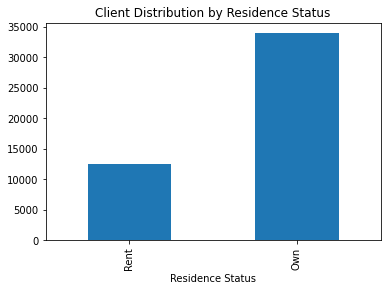

In [82]:
plot_bar_client_dist(client_deposit_combined, cat_var_name='client_residence_status',
                 xlabel='Residence Status', title='Client Distribution by Residence Status')

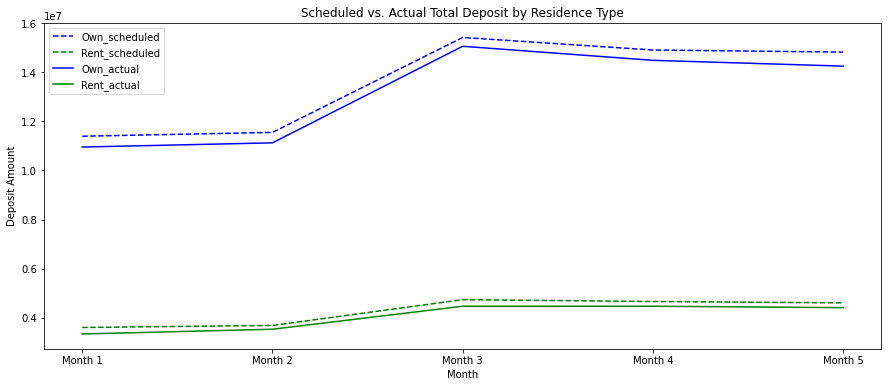

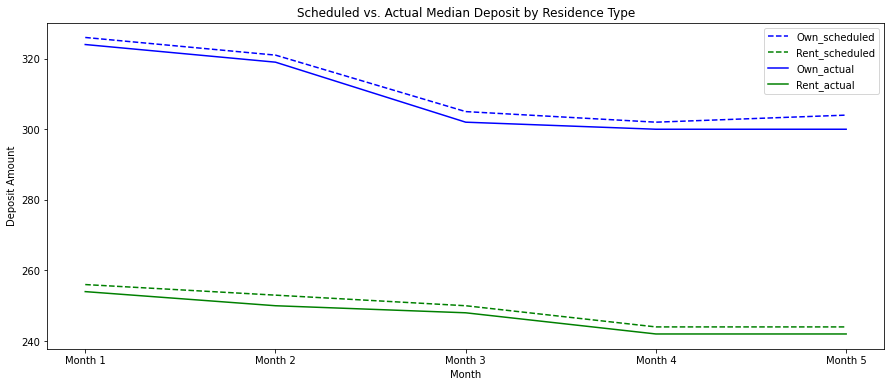

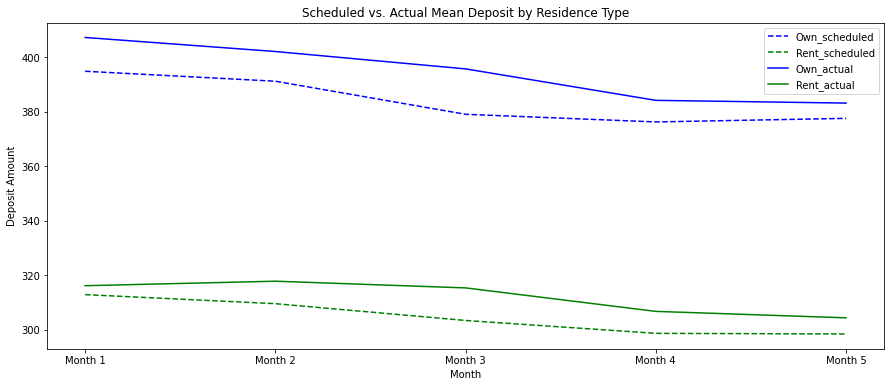

In [105]:


for name, func in func_dict.items():
    scheduled_name =client_deposit_combined[client_deposit_combined.deposit_type=='Scheduled Deposit'].\
    groupby(['client_residence_status','month_name']).deposit_amount\
    .agg(func)\
    .unstack(level=0)
    
    actual_name=client_deposit_combined[client_deposit_combined.deposit_type=='Actual Deposit']\
    .groupby(['client_residence_status','month_name']).deposit_amount\
    .agg(func)\
    .unstack(level=0)

    plot_scheduled_actual_by_month(scheduled_df= scheduled_name,
                                   actual_df=actual_name,
                                   title = f'Scheduled vs. Actual {name} Deposit by Residence Type')

## Age
* Clients mainly in age 40-60, and then followed by 30-40,70-80. I divide the age into (30-,40,50,60,70+) 5 groups
* From age bins, we notice clients whose age between 40-60 have higher increase rate in their deposit during the campaign, then followed by those age from 60-70 and 30-40. Clients who are older than 70 and less than 30 seems less impacted by campaign. So in the campaign, we need to put more focus on clients who are from 40 to 60 and followed by 60-70 and 30-40 old customers

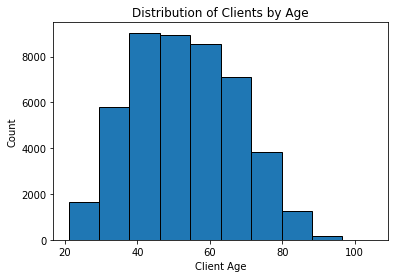

In [86]:
client_data['client_age'].hist( edgecolor='black')

plt.xlabel('Client Age')
plt.ylabel('Count')
plt.title('Distribution of Clients by Age')
plt.grid(False)
plt.show()

In [87]:
client_deposit_combined['client_age_bins']=pd.cut(x=client_deposit_combined['client_age'], bins=[1,30, 40, 50,60,70,110])
client_deposit_combined.sample(5)

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name,client_age_bins
302280,70396609147457,West,Own,56,Scheduled Deposit,327.0,Biweekly,2019-10-27,Month 5,"(50, 60]"
469048,178101062388995,West,Own,77,Scheduled Deposit,270.0,Monthly,2019-10-22,Month 5,"(70, 110]"
313946,87305783094494,West,Own,57,Actual Deposit,776.0,Monthly,2019-08-05,Month 3,"(50, 60]"
475985,522120386503498,South,Own,79,Scheduled Deposit,500.0,Monthly,2019-08-28,Month 3,"(70, 110]"
131183,505303828280081,Midwest,Own,42,Scheduled Deposit,510.0,Monthly,2019-09-30,Month 4,"(40, 50]"


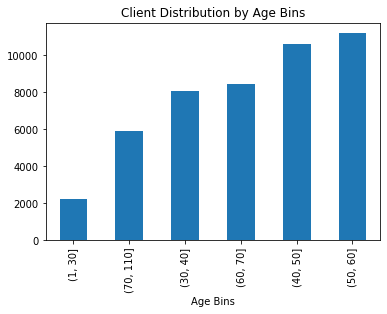

In [88]:
plot_bar_client_dist(client_deposit_combined, cat_var_name='client_age_bins',
                 xlabel='Age Bins', title='Client Distribution by Age Bins')

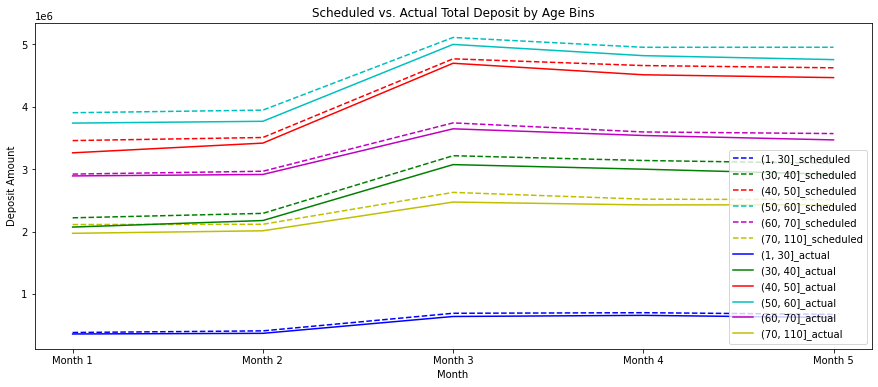

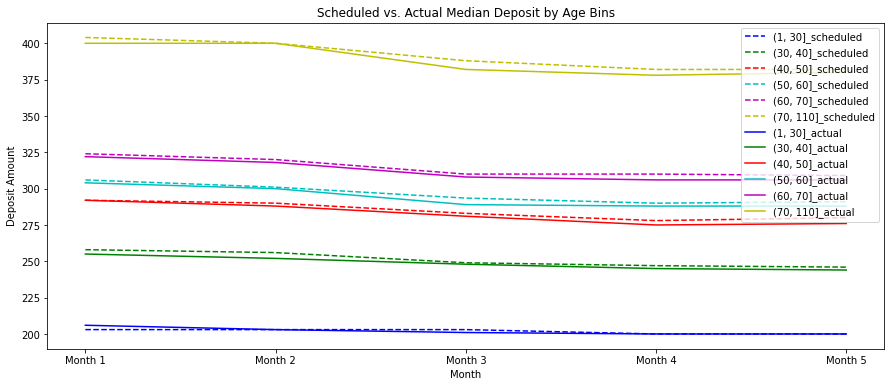

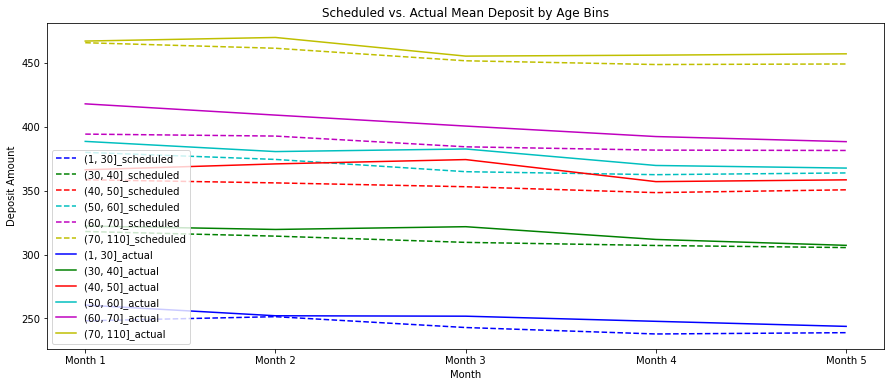

In [106]:
for name, func in func_dict.items():
    scheduled_name =client_deposit_combined[client_deposit_combined.deposit_type=='Scheduled Deposit'].\
    groupby(['client_age_bins','month_name']).deposit_amount\
    .agg(func)\
    .unstack(level=0)
    
    actual_name=client_deposit_combined[client_deposit_combined.deposit_type=='Actual Deposit']\
    .groupby(['client_age_bins','month_name']).deposit_amount\
    .agg(func)\
    .unstack(level=0)

    plot_scheduled_actual_by_month(scheduled_df= scheduled_name,
                                   actual_df=actual_name,
                                   title = f'Scheduled vs. Actual {name} Deposit by Age Bins')

## Combine all factors together
* Here I calculate the average increase rate of actual deposit amount of each section as well as deposit base distribution first and then combine them to identify clients who bring the biggest return to the campaign
 1. average increase rate = deposit increase/pre-campaign deposit
 2. deposit base distribution = Post-campaign deposit amount/ total post-campaign deposit amount
 3. return on increase rate = average increase rate(%) * deposit base distribution(%)/100
 
 *Conclusion*: The top 3 sections that bring the biggest return to the campaign are west region clients who Own house and age are among 40-50, 50-60 and 30-40 groups

In [90]:
factors_combined_df=client_deposit_combined[client_deposit_combined.deposit_type=='Actual Deposit']\
.groupby(['client_geographical_region', 'client_residence_status','client_age_bins','month_name'])\
.deposit_amount.sum().unstack(level=3)
factors_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 48 entries, ('Midwest', 'Own', Interval(1, 30, closed='right')) to ('West', 'Rent', Interval(70, 110, closed='right'))
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Month 1  48 non-null     float64
 1   Month 2  48 non-null     float64
 2   Month 3  48 non-null     float64
 3   Month 4  48 non-null     float64
 4   Month 5  48 non-null     float64
dtypes: float64(5)
memory usage: 2.5+ KB


In [91]:
factors_combined_df =factors_combined_df.reset_index()

In [92]:
# 'Month 1', 'Month 2', 'Month 3', 'Month 4',       'Month 5'
factors_combined_df['pre-sampaign_deposit']= factors_combined_df['Month 1'] +factors_combined_df['Month 2']
factors_combined_df['post-sampaign_deposit']= factors_combined_df['Month 3'] +factors_combined_df['Month 4']\
+ factors_combined_df['Month 3']
factors_combined_df['deposit_increase']= factors_combined_df['post-sampaign_deposit'] -\
factors_combined_df['pre-sampaign_deposit']
factors_combined_df['avg_increase_rate'] = factors_combined_df['deposit_increase']/factors_combined_df['pre-sampaign_deposit']
total_post_campaign_deposit = factors_combined_df['post-sampaign_deposit'].sum()
factors_combined_df['deposit_base_distribution'] = factors_combined_df['post-sampaign_deposit']/total_post_campaign_deposit
factors_combined_df['return_on_increase_rate']=factors_combined_df['deposit_base_distribution'] \
*factors_combined_df['avg_increase_rate']*100

In [93]:
selected_cols =['client_geographical_region','client_residence_status','client_age_bins',\
                'deposit_increase','avg_increase_rate','deposit_base_distribution','return_on_increase_rate']
factors_combined_df[selected_cols].sort_values(by='return_on_increase_rate',ascending=False).reset_index(drop=True)

month_name,client_geographical_region,client_residence_status,client_age_bins,deposit_increase,avg_increase_rate,deposit_base_distribution,return_on_increase_rate
0,West,Own,"(40, 50]",2483831.62,1.148741,0.080104,9.201858
1,West,Own,"(50, 60]",2618957.80,0.974287,0.091500,8.914728
2,West,Own,"(30, 40]",1531859.27,1.335243,0.046191,6.167657
3,West,Own,"(60, 70]",1839316.04,0.865247,0.068363,5.915099
4,Northeast,Own,"(40, 50]",1086163.40,1.312355,0.032996,4.330311
5,West,Own,"(70, 110]",1339534.60,0.866121,0.049760,4.309860
6,South,Own,"(40, 50]",1172068.27,1.071731,0.039063,4.186543
7,South,Own,"(50, 60]",1107575.28,0.944293,0.039319,3.712824
8,Midwest,Own,"(40, 50]",1020976.99,1.067311,0.034096,3.639076
9,Midwest,Own,"(50, 60]",1062232.61,0.967309,0.037247,3.602978


# Q3: How campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6?

If campaign is postponed to month 6, we assume freedom's clients amount are keep increasing with the rate between Month 1 and 2 till to the Month 5. And the impact of campaign that postponed to Month 6 is the same as that applied in Month 3.

Conclusion:
Comparing to the campaign deployed at Month 3, if Freedom postponed the campaign till to month 6,
* They will get $85k more actual deposit
* The campaign cost is 42.55% of the increased actual deposit which compares to the deposit without campaign. The percentage is 45.88% at campaign deployed at Month3
* The threshold fee rate drops 0.64% to 8.12% which can keep balance with the campaign cost. 



In [94]:
# we focus on actual deposit calculation
selected_cols=['month_name', 'actual_depoist',       'acct_deposit_pct_change',
       'actual_depoist_base', 'actual_depoist_delta']
deposit_df_analysis_6 =deposit_df_analysis[selected_cols].copy()

In [98]:
deposit_df_analysis_6= pd.DataFrame()
deposit_df_analysis_6['month_name']= ['Month '+str(i) for i in range(1,9) ]

deposit_df_analysis_6['actual_depoist_base']= calculate_control(Mth1_actual_deposit, Mth2_actual_deposit, mths=8)
deposit_df_analysis_6['actual_depoist_campaign_mn6'] = deposit_df_analysis_6['actual_depoist_base']
deposit_df_analysis_6.loc[5,'actual_depoist_campaign_mn6']=(1+deposit_df_analysis.loc[2,'acct_deposit_pct_change'])\
*deposit_df_analysis_6.loc[4,'actual_depoist_campaign_mn6']
deposit_df_analysis_6.loc[6,'actual_depoist_campaign_mn6']=(1+deposit_df_analysis.loc[3,'acct_deposit_pct_change'])\
*deposit_df_analysis_6.loc[5,'actual_depoist_campaign_mn6']
deposit_df_analysis_6.loc[7,'actual_depoist_campaign_mn6']=(1+deposit_df_analysis.loc[4,'acct_deposit_pct_change'])\
*deposit_df_analysis_6.loc[6,'actual_depoist_campaign_mn6']
deposit_df_analysis_6



,month_name,actual_depoist_base,actual_depoist_campaign_mn6
0,Month 1,1.429018e+07,1.429018e+07
1,Month 2,1.465362e+07,1.465362e+07
2,Month 3,1.502631e+07,1.502631e+07
3,Month 4,1.540847e+07,1.540847e+07
4,Month 5,1.580035e+07,1.580035e+07
5,Month 6,1.620219e+07,2.105228e+07
6,Month 7,1.661426e+07,2.043463e+07
7,Month 8,1.703681e+07,2.011774e+07


In [99]:
deposit_df_analysis_6['actual_depoist_delta']=deposit_df_analysis_6['actual_depoist_campaign_mn6']-\
deposit_df_analysis_6['actual_depoist_base']
delta6= deposit_df_analysis_6['actual_depoist_delta'].sum()
print(f'Freedom gets {round(delta6,2):,} more actual deposit after apply the campaign at Month6')
print(f'The incremental actual deposit that compares to campaign deployed at Month 3 are {delta6- delta:.2}')
# from the data we could find 5 million campaign bring back around 10.9 million actual amount,i.e. Marketing fee is around
# 46% of the delta deposit. So, only if the fee rate for delta amount is great than 46%,  we can say the Marketing campaign is success
campaign_delta_ratio_6= campaign_fee/delta6
print(f'The campaign vs delta actual deposits is {campaign_delta_ratio_6:.2%}')
print(f'The delta to that of campaign deployed at Month 3 are {campaign_delta_ratio_6- campaign_delta_ratio:.2%}')
after_campaign_actual_depoist_6 = deposit_df_analysis_6[deposit_df_analysis_6.month_name.isin\
                                                           (['Month 6', 'Month 7','Month 8'])]\
['actual_depoist_campaign_mn6'].sum()
fee_rate_threshold_6= campaign_fee/after_campaign_actual_depoist_6
print(f'The success campaign related fee rate threshold is {fee_rate_threshold_6:.2%}')
print(f'The delta to that of campaign deployed at Month 3 are {fee_rate_threshold_6- fee_rate_threshold:.2%}')

Freedom gets 11,751,387.29 more actual deposit after apply the campaign at Month6
The incremental actual deposit that compares to campaign deployed at Month 3 are 8.5e+05
The campaign vs delta actual deposits is 42.55%
The delta to that of campaign deployed at Month 3 are -3.33%
The success campaign related fee rate threshold is 8.12%
The delta to that of campaign deployed at Month 3 are -0.64%


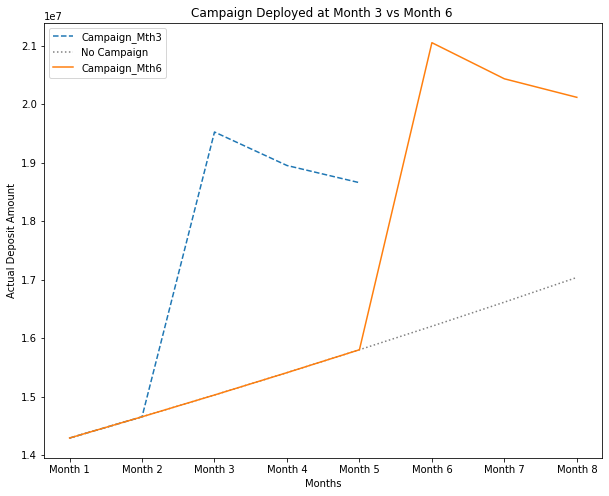

In [100]:
plt.figure(figsize=(10,8))
# plt.plot(deposit_df_analysis['month_name'],deposit_df_analysis['actual_depoist_base'] )
plt.plot(deposit_df_analysis['month_name'],deposit_df_analysis['actual_depoist'], linestyle='--', label='Campaign_Mth3' )
plt.plot(deposit_df_analysis_6['month_name'],deposit_df_analysis_6['actual_depoist_base'],\
         color='grey', linestyle=':', label='No Campaign')
plt.plot(deposit_df_analysis_6['month_name'],deposit_df_analysis_6['actual_depoist_campaign_mn6'],label='Campaign_Mth6' )
plt.legend()
plt.xlabel('Months')
plt.ylabel('Actual Deposit Amount')
plt.title('Campaign Deployed at Month 3 vs Month 6 ')
plt.show()